# Looking only at images with comments at least with min_words = 0

In [1]:
from aestheval.data.datasets import AVA, Reddit, PCCD
import torch
from tqdm import tqdm
SPLITS = ('train', 'validation', 'test')

ava_dataset = [AVA(split, dataset_path="/media/data-storage/datasets/ava", load_images=False, min_words=0, informativeness=True) for split in SPLITS]
reddit_dataset = [Reddit(split, dataset_path="/media/data-storage/datasets/reddit", load_images=False, min_words=0, informativeness=True) for split in SPLITS]
pccd_dataset = [PCCD(split, dataset_path="/media/data-storage/datasets/PCCD", load_images=False, min_words=0, informativeness=True) for split in SPLITS]

dataset = torch.utils.data.ConcatDataset(ava_dataset + reddit_dataset + pccd_dataset)

/home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/daniel/anaconda3/envs/aestheval/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


Using path:  /media/data-storage/datasets/ava/processed_info_train.json
Using path:  /media/data-storage/datasets/ava/processed_info_validation.json
Using path:  /media/data-storage/datasets/ava/processed_info_test.json
Using path:  /media/data-storage/datasets/reddit/processed_info_train.json
Using path:  /media/data-storage/datasets/reddit/processed_info_validation.json
Using path:  /media/data-storage/datasets/reddit/processed_info_test.json
Using path:  /media/data-storage/datasets/PCCD/processed_info_train.json
Using path:  /media/data-storage/datasets/PCCD/processed_info_validation.json
Using path:  /media/data-storage/datasets/PCCD/processed_info_test.json


In [2]:
len(dataset)

327549

In [3]:
ncomments={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
nwords={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }

info_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
    
sentiment_mean_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
    }
sentiment_stdev_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
sentiment_len_score={
    'ava':[],
    'reddit': [],
    'pccd':[]
}

comments={
    'ava':[],
    'reddit': [],
    'pccd':[]
}
for im, d in dataset:
    # print(d)
    ncomments[d['dataset_name']].append(len(d['comments']))
    nwords[d['dataset_name']].extend([len(x.split()) for x in d['comments']])
    sentiment_mean_score[d['dataset_name']].append(d['mean_score'])
    sentiment_stdev_score[d['dataset_name']].append(d['stdev_score'])
    sentiment_len_score[d['dataset_name']].append(d['number_of_scores'])
    comments[d['dataset_name']].extend(d['comments'])
    info_score[d['dataset_name']].extend([score for score in d['info_scores'] if score!=float('inf')])


count    252481.000000
mean         10.085634
std           9.016812
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         182.000000
Name: ava, dtype: float64
count    70833.000000
mean         2.789787
std          3.347850
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        111.000000
Name: reddit, dtype: float64
count    4235.000000
mean        5.778749
std         1.282093
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


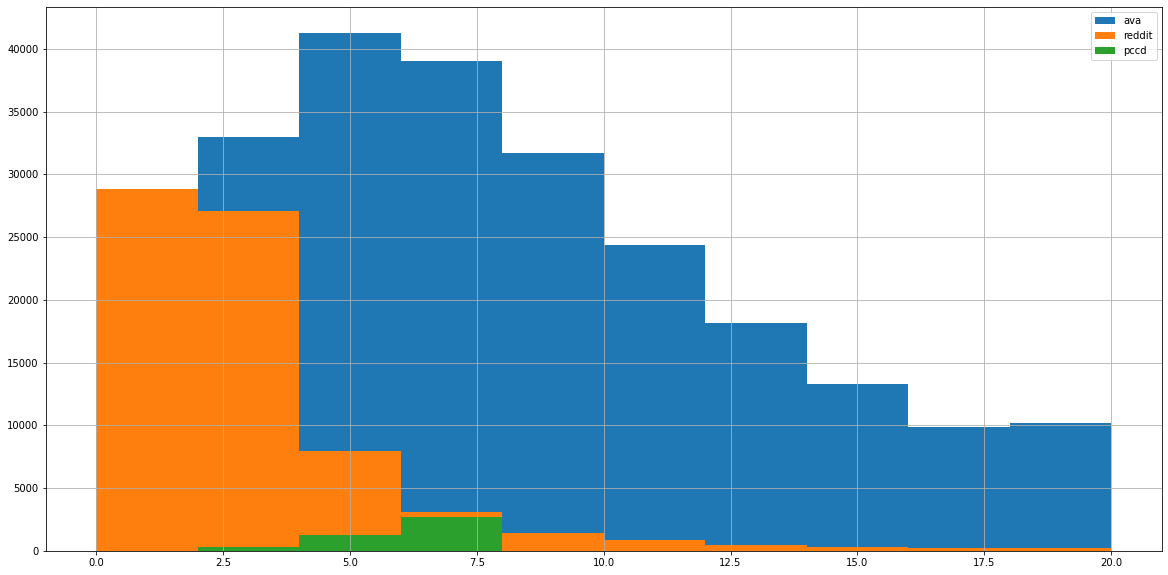

In [4]:
import pandas as pd
for name, data in ncomments.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=10, range=[0, 20], figsize=(20,10), legend=True)

count    2.546431e+06
mean     1.606762e+01
std      1.751592e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      2.146000e+03
Name: ava, dtype: float64
count    197609.000000
mean         48.430603
std          53.513655
min           1.000000
25%          17.000000
50%          33.000000
75%          60.000000
max        1218.000000
Name: reddit, dtype: float64
count    24473.000000
mean        42.510317
std         42.105011
min          1.000000
25%         15.000000
50%         31.000000
75%         56.000000
max        780.000000
Name: pccd, dtype: float64


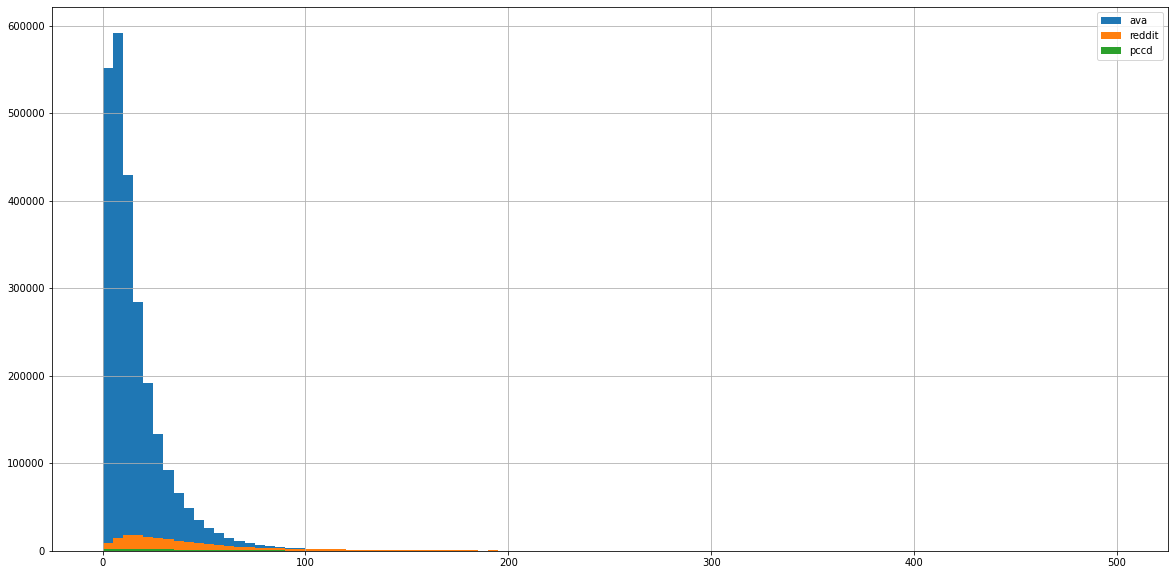

In [5]:
for name, data in nwords.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True, range=[0,500])

In [6]:
# % samples of the info in dataset
for i in range(5):
    print(dataset[i])


(None, {'im_id': '953417', 'im_score': 6.11290322581, 'query': 1396, 'im_name': '953417.jpg', 'comments': ["6.1! Nice! You have mad macro skills! You'll notice I don't have any... because I suck at it.", 'Frog with attitude; love it.  Reminds me of Jabba of Star Wars, lol. (voted earlier)', 'he does look kind of lonely. Funky colors.', "No thanks, he is quite blue is'nt he, I like this."], 'sentiment': {0: {'Negative': 0.3295336663722992, 'Neutral': 0.2320113182067871, 'Positive': 0.4384550452232361}, 1: {'Negative': 0.005600472446531057, 'Neutral': 0.03543514013290405, 'Positive': 0.9589643478393555}, 2: {'Negative': 0.5221530795097351, 'Neutral': 0.4549880623817444, 'Positive': 0.022858841344714165}, 3: {'Negative': 0.03750083968043327, 'Neutral': 0.2324349284172058, 'Positive': 0.7300642728805542}}, 'mean_score': 0.7937589464709163, 'stdev_score': 0.28548399376779676, 'number_of_scores': 7, 'dataset_name': 'ava', 'reduced_tokenized_comments': [{'raw': "6.1! Nice! You have mad macro 

count    252481.000000
mean          0.741616
std           0.169056
min           0.026004
25%           0.637539
50%           0.772235
75%           0.873714
max           0.993714
Name: ava, dtype: float64
count    70833.000000
mean         0.593758
std          0.249441
min          0.023793
25%          0.411338
50%          0.599414
75%          0.799125
max          0.993823
Name: reddit, dtype: float64
count    4235.000000
mean        0.745682
std         0.148654
min         0.108129
25%         0.662141
50%         0.770348
75%         0.855738
max         0.987247
Name: pccd, dtype: float64


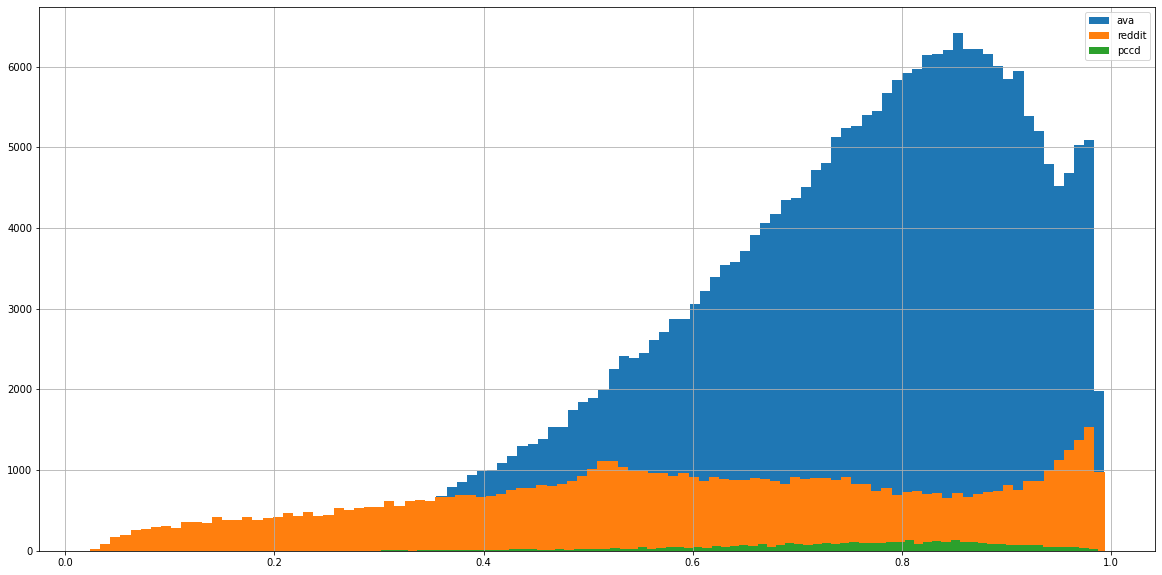

In [7]:
# Distribution of mean sentiment score per dataset

for name, data in sentiment_mean_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)



count    252481.000000
mean          0.244865
std           0.109945
min           0.000000
25%           0.182149
50%           0.261602
75%           0.321200
max           0.679175
Name: ava, dtype: float64
count    70833.000000
mean         0.152720
std          0.159109
min          0.000000
25%          0.000000
50%          0.112605
75%          0.281237
max          0.678301
Name: reddit, dtype: float64
count    4235.000000
mean        0.225718
std         0.093999
min         0.000000
25%         0.161975
50%         0.234631
75%         0.296136
max         0.466233
Name: pccd, dtype: float64


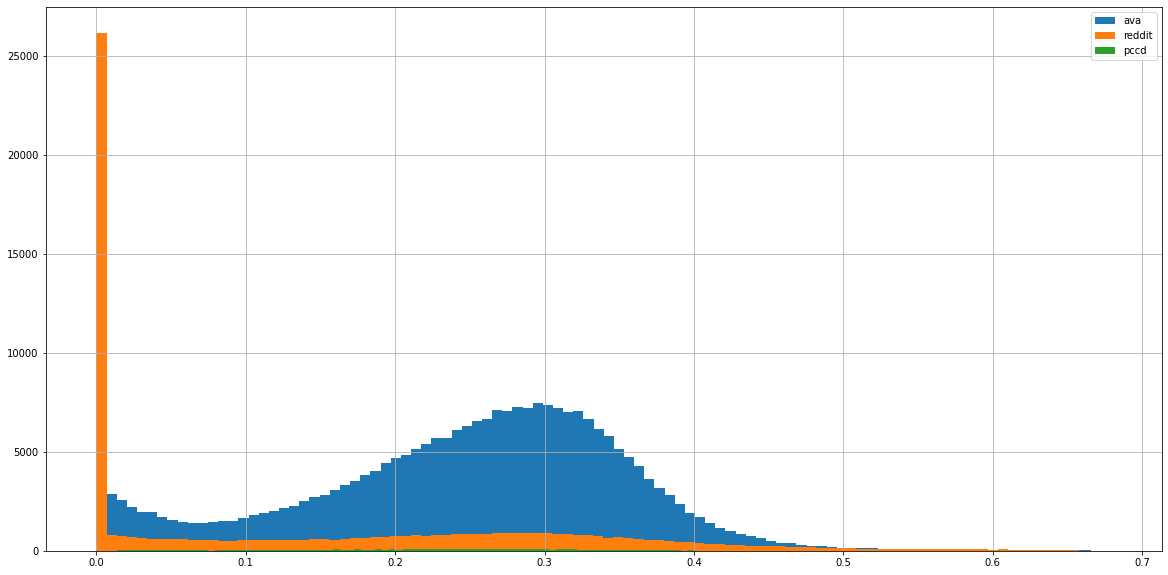

In [8]:
# Distribution of stdev sentiment score per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_stdev_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

count    252481.000000
mean         13.275474
std          13.137190
min           1.000000
25%           6.000000
50%          10.000000
75%          16.000000
max         367.000000
Name: ava, dtype: float64
count    70833.000000
mean         3.056753
std          3.756032
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        126.000000
Name: reddit, dtype: float64
count    4235.000000
mean        6.628099
std         0.647523
min         4.000000
25%         6.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: pccd, dtype: float64


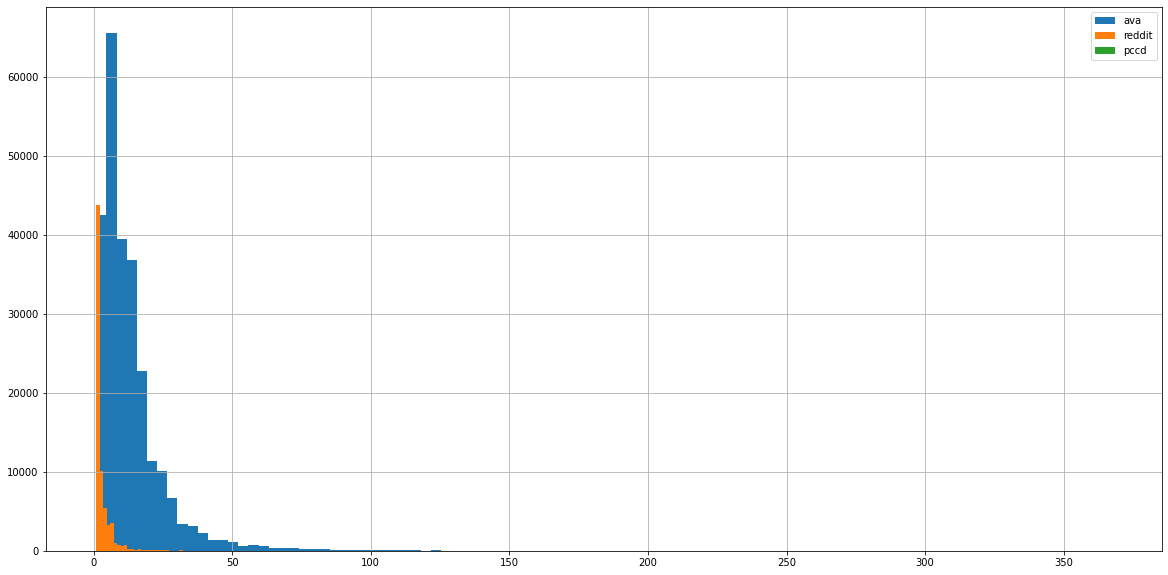

In [9]:
# Distribution of number of scores per dataset
# Reddit has a lot of images with only one comment, hence stdev=0
for name, data in sentiment_len_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    s.hist(bins=100, figsize=(20,10), legend=True)

## Informativeness score

count    2.545571e+06
mean     3.243623e+01
std      3.255383e+01
min      1.613968e+00
25%      1.071335e+01
50%      2.286119e+01
75%      4.269820e+01
max      3.722200e+02
Name: ava, dtype: float64
count    193555.000000
mean         78.612339
std          69.789360
min           1.823322
25%          28.615520
50%          57.512808
75%         106.205990
max         372.220036
Name: reddit, dtype: float64
count    24230.000000
mean        73.080164
std         65.365360
min          1.575003
25%         25.810735
50%         54.684958
75%        100.685479
max        372.220036
Name: pccd, dtype: float64


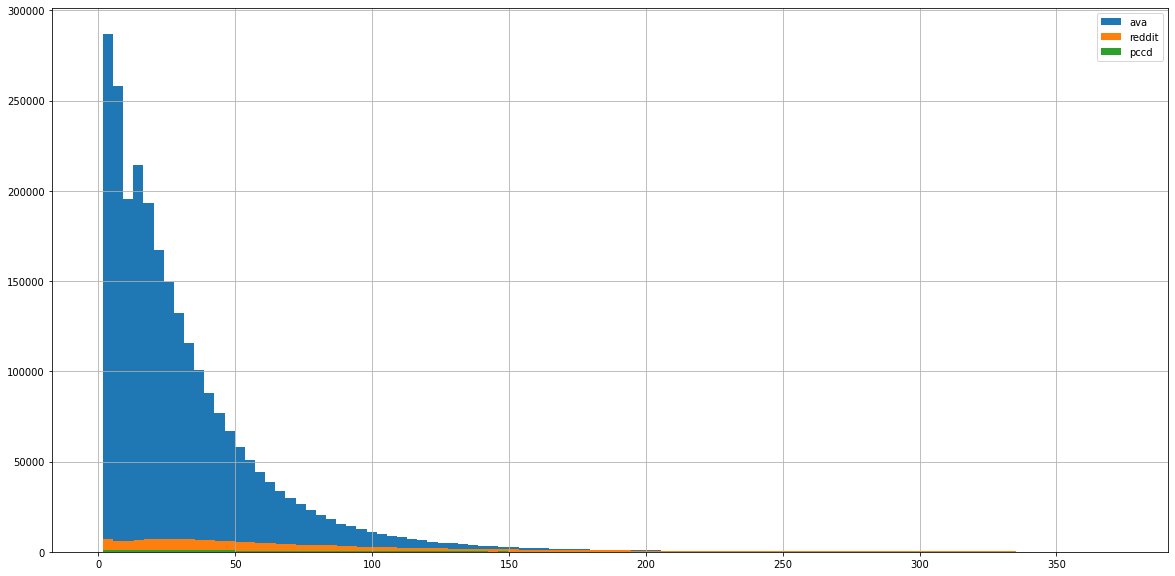

In [10]:
# Distribution of informativeness score per dataset

for name, data in info_score.items():
    s = pd.Series(data, name=name)
    print(s.describe())
    # print(s.describe().to_latex())
    s.hist(bins=100, figsize=(20,10), legend=True)



# BERTopic


In [21]:
from bertopic import BERTopic
from aestheval.data.datautils.data_cleaning import clean_text
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['ava']])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [22]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,58176,-1_this_it_and_you
1,0,3159,0_tree_trees_branches_branch
2,1,3131,1_her_she_face_hair
3,2,2640,2_flower_flowers_petals_stem
4,3,2133,3_child_baby_boy_kids
...,...,...,...
621,625,10,625_recorder_music_instrument_microphone
620,626,10,626_shake_intruduced_astheticly_pastey
619,627,10,627_verry_judah_unhapy_diversity
617,623,10,623_yolk_yolks_grooves_yellow


In [23]:
topic_model.visualize_barchart(top_n_topics=24)

In [24]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['reddit']])

In [25]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,28715,-1_the_and_it_to
1,0,4767,0_her_she_face_hair
2,1,2340,1_tree_trees_branches_the
3,2,2067,2_his_him_he_hes
4,3,1138,3_bird_birds_feathers_wildlife
...,...,...,...
347,346,10,346_film_porta_interactions_400
348,347,10,347_bokeh_flower_flowers_dandelion
349,348,10,348_print_prints_printing_printed
350,349,10,349_tripod_tripods_hurting_backpack


In [26]:
topic_model.visualize_barchart(top_n_topics=24)

In [27]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform([clean_text(comment) for comment in comments['pccd']])

In [28]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,3381,-1_the_and_of_in
1,0,725,0_you_this_it_that
2,1,268,1_composition_the_subject_frame
3,2,208,2_depth_field_focus_aperture
4,3,154,3_iso_noise_speed_shutter
...,...,...,...
89,88,12,88_turtle_snail_turtles_sea
90,89,12,89_reflection_truck_reflector_rearview
91,90,12,90_building_shadows_lit_light
92,91,11,91_verticle_cropped_shot_lamp


In [29]:
topic_model.visualize_barchart(top_n_topics=24)